<a href="https://colab.research.google.com/github/dhanvanth342/Forest_clustering/blob/main/Forest_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading the dataset
file_path = r'/content/Merged_Subsampling_Remove Outliers_Normalize by Ground Points_Point Cloud Segmentation.csv'
data = pd.read_csv(file_path)

# Select relevant features for clustering and removal heuristic
features_for_clustering = ['TreePosX', 'TreePosY']
features_for_removal = ['TreeID', 'TreePosX', 'TreePosY', 'TreePosZ', 'TreeHeight(metre)', 'DBH(metre)',
                         'CrownDiameter(metre)', 'CrownDiameter(S-N)(metre)', 'CrownDiameter(E-W)(metre)',
                         'CrownArea(square metre)', 'CrownVolume(cubic metre)', 'OldID']





In [4]:
# Choose the number of clusters
num_clusters = 10

# Perform KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[features_for_clustering])

# Heuristic for selecting trees to remove based on DBH, height, crown area, and crown volume
def select_trees_for_removal(cluster_data):
    # Sort trees within each cluster based on a combination of factors
    #here we selecting the features from the 4column to 11th column
    sorted_cluster = cluster_data.sort_values(by=features_for_removal[4:11], ascending=[True, True, True, True, True, True, True])

    # Select a percentage of trees for removal (adjustable)
    removal_percentage = 20
    num_trees_to_remove = int(len(sorted_cluster) * (removal_percentage / 100))

    # Return the selected trees for removal
    return sorted_cluster.head(num_trees_to_remove)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



**Here it sorts the trees within each cluster based on a combination of factors specified by the features_for_removal variable. Then, it selects a percentage of trees from the beginning of the sorted list for removal.**


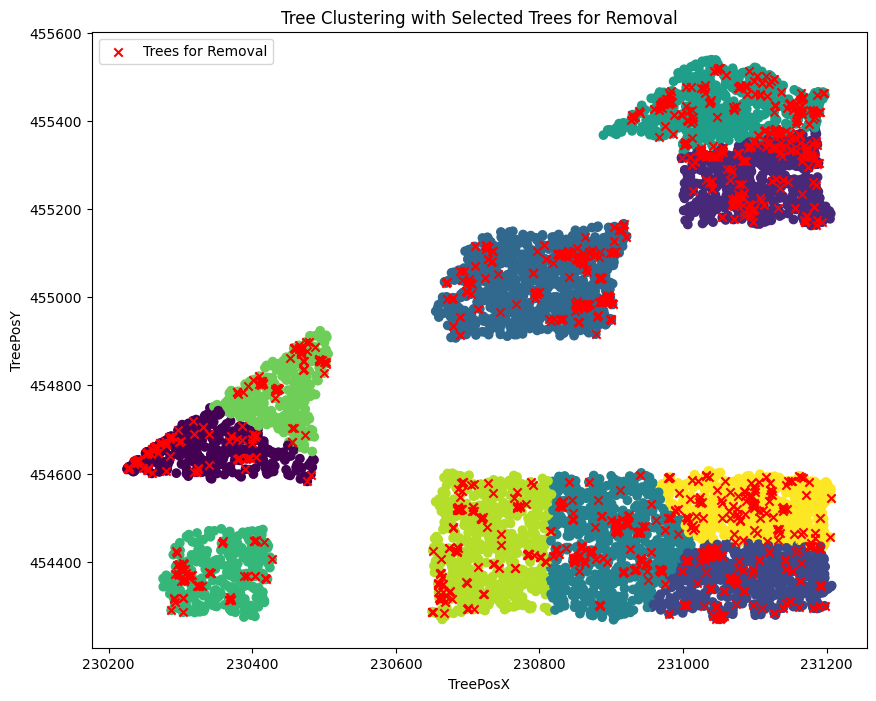

In [6]:
import matplotlib.pyplot as plt

# Apply the heuristic to each cluster
trees_to_remove = data.groupby('Cluster').apply(select_trees_for_removal).reset_index(drop=True)

# Save the selected trees for removal to a CSV file
output_file_path = r'D:\ML@IIT\Eli Jensen - Ironwood Forestry\selected_trees_for_removal.csv'
trees_to_remove.to_csv(output_file_path, index=False)

# Set the size of the figure
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired (width, height in inches)

# Visualize the clustering results with selected trees for removal
plt.scatter(data['TreePosX'], data['TreePosY'], c=data['Cluster'], cmap='viridis')
plt.scatter(trees_to_remove['TreePosX'], trees_to_remove['TreePosY'], marker='x', color='red', label='Trees for Removal')
plt.title('Tree Clustering with Selected Trees for Removal')
plt.xlabel('TreePosX')
plt.ylabel('TreePosY')
plt.legend()

# Save the plot with DPI=1000
plt.savefig('tree_clustering_with_removal.png', dpi=1000)

# Show the plot
plt.show()
